<a href="https://colab.research.google.com/github/realpranav93/EVA-projects/blob/master/Session2_pranavasai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Not an ideal network**

In [0]:
#@title ### KeyPoints 
#@markdown - **!** is used to run codes in command line directly
#@markdown - **-q** is used to hide the outputs of pip install 
# https://keras.io/
!pip install -q keras
#@markdown - Keras as an Neural network API which is easy to use and capable of working with multiple deeplearning frameworks like TensorFlow, CNTK e.t.c.
import keras


In [0]:
#@title ###KeyPoints
#@markdown - All the inputs/outputs to keras models are ndarrays or in another terms tensors 
import numpy as np 
#@markdown - Keras has stand alone class for models, activation functions, intializing schemes, optimizers e.t.c. 
#@markdown - Keras has mainly 2 types of model building classes namely Sequential and Model(functional API) where sequential class is to build a simple linear stack of layers where as Model is for complex nueral networks with multiple inputs and networks.  
from keras.models import Sequential
#@markdown - Flatten is used to transform a tensor into 1d array
from keras.layers import Flatten
#@markdown - Helps in image convolution
from keras.layers import Convolution2D

from keras.utils import np_utils
#@markdown - Importing a dataset of 60,000 28x28 grayscale images of the 10 digits, along with a test set of 10,000 images.
from keras.datasets import mnist

In [9]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


(60000, 28, 28)


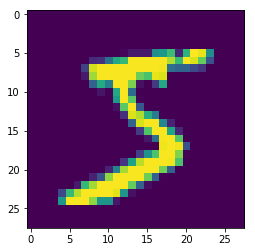

In [10]:
#@title ###Keypoints
print (X_train.shape)
from matplotlib import pyplot as plt
#@markdown - %matplotlib inline is a line oriented magic function which helps in using the rendered image directly as part of your code and not use other applications to view the image in case of Frontend python applications like Jupyter.
%matplotlib inline
plt.imshow(X_train[0])


In [11]:
#@title KeyPoints
#@markdown - Convolution2D method of Keras takes 4D tensor as an input. So we need to transform our input data from MNIST to the format that the layer would consume
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)
#@markdown - With default settings of data_format(last_channel) 4D tensor is of the format[batch,height,width,channel] which in this case are [6000,28,28,1] respectively
X_train.shape

(60000, 28, 28, 1)

In [0]:
#@title KeyPoints
#@markdown - We normalize pixel values of the image as we do not want biggers values to have higher impact during the network training(back propagation)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [13]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
#@title KeyPoints 
#@markdown - As the problem is to identify the number that is written we are working towards multi class classification for which we need to convert labels to catorical variable
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [15]:
#@title KeyPoints
from keras.layers import Activation, MaxPooling2D

model = Sequential() 
#@markdown - We need to give the input shape of the image for the convolution layer explicitly which in our case is 28x28x1.Input size for the subsequent layer is automatically detected in case of a sequential model
#@markdown - Layer1 - **receptive field:**3, **input_channel_dim:** 28x28X1
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))
#@markdown - Layer2 - **receptive field:**5, **input_channel_dim:** 26x26X32
model.add(Convolution2D(64, 3, 3, activation='relu'))
#@markdown - Layer3 - **receptive field:**7, **input_channel_dim:** 24x24X64
model.add(Convolution2D(128, 3, 3, activation='relu'))
#@markdown - Layer4 - **receptive field:**14, **input_channel_dim:** 22x22X128
model.add(MaxPooling2D(pool_size=(2, 2)))
#@markdown - Layer5 - **receptive field:**16, **input_channel_dim:** 11x11X128
model.add(Convolution2D(256, 3, 3, activation='relu'))
#@markdown - Layer6 - **receptive field:**18, **input_channel_dim:** 9x9x256
model.add(Convolution2D(512, 3, 3, activation='relu'))
#@markdown - Layer7 - **receptive field:**20, **input_channel_dim:** 7x7x512
model.add(Convolution2D(1024, 3, 3, activation='relu'))
#@markdown - Layer8 - **receptive field:**22, **input_channel_dim:** 5x5x1024
model.add(Convolution2D(2048, 3, 3, activation='relu'))
#@markdown - Layer8 - **receptive field:**24, **input_channel_dim:** 3x3x2048
model.add(Convolution2D(10, 3, 3, activation='relu'))


model.add(Flatten())
model.add(Activation('softmax'))

model.summary()

Instructions for updating:
Colocations handled automatically by placer.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu")`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(512, (3, 3), activation="relu")`
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 22, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 9, 9, 256)         295168    
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 7, 7, 512)         1180160   
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 5, 5, 1024)        4719616   
__________

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [17]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

Instructions for updating:
Use tf.cast instead.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/10
60000/60000 [==============================] - 121s 2ms/step - loss: 2.3029 - acc: 0.0986
Epoch 2/10
60000/60000 [==============================] - 115s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 3/10
60000/60000 [==============================] - 115s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 4/10
60000/60000 [==============================] - 115s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 5/10
60000/60000 [==============================] - 115s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 6/10
60000/60000 [==============================] - 115s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 7/10
60000/60000 [==============================] - 115s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 8/10
60000/60000 [==============================] - 115s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 9/10
60000/60000 [==============================] - 115s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 10/10
60000/60000 [==============================] - 115s 2ms/step - loss: 2.3026 - a

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [19]:
print(score)

[2.3025851249694824, 0.098]


In [0]:
y_pred = model.predict(X_test)

In [21]:
print(y_pred[:9])
print(y_test[:9])

[[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]]
[7 2 1 0 4 1 4 9 5]


### Final Observations
- Each neuron in the final flatened 1X1X10 layer is not connected to all the neurons from the previous layer. So, there is loss of information. So ideally, a densely connected neural network layer with 10 neurons should be added before we use softmax.